In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


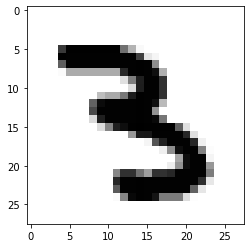

3


In [3]:
from random import randint
from matplotlib import pyplot

random=randint(0,X_train.shape[0])

pyplot.imshow(X_train[random], cmap="gray_r")
pyplot.show()

print(y_train[random])

In [4]:
# Transform from matrix to vector, cast and normalize
image_size = 28*28

X_train_normalized=X_train.reshape(X_train.shape[0],image_size)
X_train_normalized=X_train_normalized.astype('float32')
X_train_normalized/=255

X_test_normalized = X_test.copy()

X_test_normalized =X_test_normalized.reshape(X_test_normalized .shape[0],image_size)
X_test_normalized =X_test_normalized .astype('float32')
X_test_normalized /=255


In [5]:
# Convert class vector to binary class matrices
from keras.utils import np_utils
y_train_matrix=np_utils.to_categorical(y_train,10)

y_test_matrix = y_test.copy()
y_test_matrix=np_utils.to_categorical(y_test_matrix,10)

In [6]:
# Common model
from keras.models import Sequential
model = Sequential()

In [7]:
# Layers
from keras.layers import Dense

In [8]:
model.add(Dense(units=512,activation='sigmoid',input_shape=(image_size,)))

model.add(Dense(units=512, activation="sigmoid"))

In [9]:
layer_output=Dense(units=10,activation="softmax")

model.add(layer_output)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
model.fit(X_train_normalized,y_train_matrix,epochs=5,verbose=True,validation_split=0.01)

Epoch 1/5
1857/1857 [==============================] - 17s 9ms/step - loss: 2.1280 - accuracy: 0.3503 - val_loss: 1.8173 - val_accuracy: 0.5367
Epoch 2/5
1857/1857 [==============================] - 16s 9ms/step - loss: 1.3817 - accuracy: 0.6937 - val_loss: 0.9020 - val_accuracy: 0.8283
Epoch 3/5
1857/1857 [==============================] - 16s 8ms/step - loss: 0.8067 - accuracy: 0.8060 - val_loss: 0.5561 - val_accuracy: 0.8883
Epoch 4/5
1857/1857 [==============================] - 16s 9ms/step - loss: 0.5979 - accuracy: 0.8445 - val_loss: 0.4232 - val_accuracy: 0.9150
Epoch 5/5
1857/1857 [==============================] - 16s 9ms/step - loss: 0.5012 - accuracy: 0.8654 - val_loss: 0.3638 - val_accuracy: 0.9200


In [16]:
predictions = model.predict(X_test_normalized)

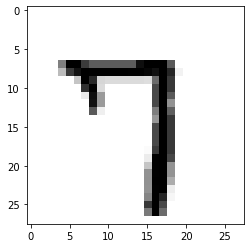

[4.1631560e-04 3.4307766e-05 2.4057853e-04 7.8742718e-03 9.7625260e-04
 1.9993060e-03 4.9015944e-06 8.8978678e-01 3.1070059e-04 9.8356612e-02]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [18]:
random = randint(0,X_test.shape[0])

pyplot.imshow(X_test[random], cmap="gray_r")
pyplot.show()

print(predictions[random])
print(predictions[random].argmax(axis=0))

print(y_test_matrix[random])
print(y_test[random])